In [1]:
!nvidia-smi

Fri Jun 30 13:46:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.47                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 L...    On | 00000000:01:00.0 Off |                  N/A |
| N/A   58C    P8                9W /  N/A|     13MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
print(train_input.shape)
print(test_input.shape)

(25000,)
(25000,)


In [6]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [7]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
print(train_target[:20])

# 1 = positive review
# 0 = negative review

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [10]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [12]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(f"average review length: {np.mean(lengths)}, median review length: {np.median(lengths)}")

average review length: 239.00925, median review length: 178.0


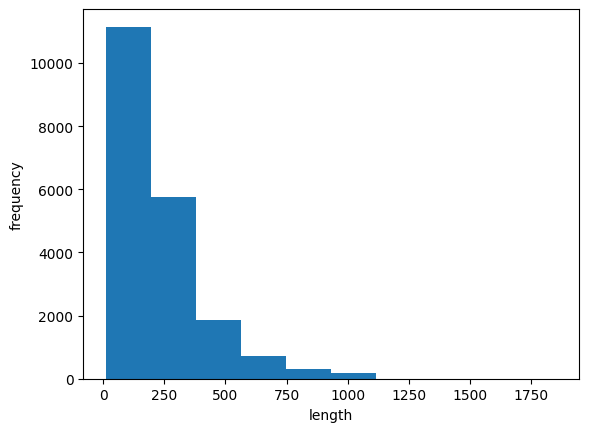

In [14]:
# Frequency according to the IMDB review lengths
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")

plt.show()

In [18]:
# Make every IMDB review has 100 words (cutting)
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)

In [19]:
print(train_seq)
print(train_seq.shape)

[[ 10   4  20 ...  10 470 158]
 [206   2  26 ...   6   2   2]
 [  2   7   2 ...   2   2  12]
 ...
 [  2  37 299 ...   7  14   2]
 [  0   0   0 ...  25 170   2]
 [  0   0   0 ...  25 194   2]]
(20000, 100)


In [22]:
print(train_seq[0])

# Because the processed review data doesn't end with 0(padding), we can know this data has been cut

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [24]:
print(train_input[0][-10:])

# pad_sequences() method bascially cut from the end (not from the start) becasue
# they think the more useful information is on the rear end of the reviews

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [27]:
print(train_seq[5])

# Because this starts with multiple 0(padding)s, we can know the original 5th review was less than 100 words

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [28]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [30]:
# Create a RNN model
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [31]:
train_oh = keras.utils.to_categorical(train_seq)

In [32]:
print(train_oh.shape)

(20000, 100, 500)


In [34]:
print(train_oh[0])          # one-hot encoding to neutralize correlations between integers representing unique words in the given text

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
print(np.sum(train_oh[0][0]))

1.0


In [37]:
val_oh = keras.utils.to_categorical(val_seq)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Train
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_oh, train_target,
                    epochs = 100,
                    batch_size = 64,
                    validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 40s 116ms/step - loss: 0.6986 - accuracy: 0.4984 - val_loss: 0.6939 - val_accuracy: 0.5102
Epoch 2/100
313/313 [==============================] - 31s 99ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6915 - val_accuracy: 0.5214
Epoch 3/100
313/313 [==============================] - 29s 94ms/step - loss: 0.6902 - accuracy: 0.5294 - val_loss: 0.6894 - val_accuracy: 0.5316
Epoch 4/100
313/313 [==============================] - 31s 99ms/step - loss: 0.6878 - accuracy: 0.5476 - val_loss: 0.6872 - val_accuracy: 0.5460
Epoch 5/100
313/313 [==============================] - 29s 93ms/step - loss: 0.6852 - accuracy: 0.5594 - val_loss: 0.6854 - val_accuracy: 0.5592
Epoch 6/100
313/313 [==============================] - 30s 96ms/step - loss: 0.6822 - accuracy: 0.5731 - val_loss: 0.6826 - val_accuracy: 0.5662
Epoch 7/100
313/313 [==============================] - 29s 94ms/step - loss: 0.6768 - accuracy: 0.5896 - val_loss: 0.6719 - val_a

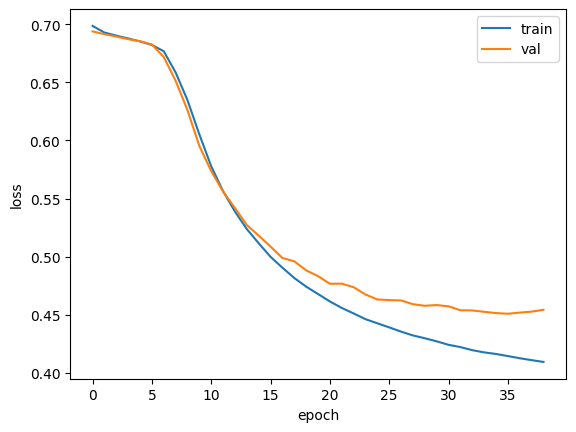

In [40]:
# Damn f*** it takes too long with my laptop GPU

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])

plt.show()

In [42]:
# one hot encoding makes the data much BIGGER
print(train_seq.nbytes)     # original
print(train_oh.nbytes)      # preprocessed (one-hot encoding)

8000000
4000000000


In [49]:
# use word embedding instead

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

In [50]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [51]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-embedding-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target,
                     epochs = 100,
                     batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 45s 140ms/step - loss: 0.6953 - accuracy: 0.5023 - val_loss: 0.6925 - val_accuracy: 0.5194
Epoch 2/100
313/313 [==============================] - 38s 121ms/step - loss: 0.6917 - accuracy: 0.5208 - val_loss: 0.6910 - val_accuracy: 0.5312
Epoch 3/100
313/313 [==============================] - 38s 122ms/step - loss: 0.6838 - accuracy: 0.5708 - val_loss: 0.6774 - val_accuracy: 0.6122
Epoch 4/100
313/313 [==============================] - 36s 116ms/step - loss: 0.6654 - accuracy: 0.6481 - val_loss: 0.6585 - val_accuracy: 0.6580
Epoch 5/100
313/313 [==============================] - 39s 126ms/step - loss: 0.6428 - accuracy: 0.6924 - val_loss: 0.6384 - val_accuracy: 0.6890
Epoch 6/100
313/313 [==============================] - 35s 112ms/step - loss: 0.6206 - accuracy: 0.7177 - val_loss: 0.6169 - val_accuracy: 0.7234
Epoch 7/100
313/313 [==============================] - 38s 121ms/step - loss: 0.5993 - accuracy: 0.7405 - val_loss: 0.6007 -

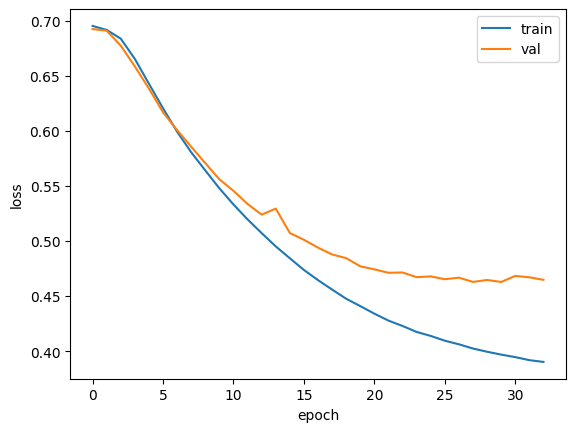

In [52]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])

plt.show()